# PyTorch Homework
## 作業說明
這個作業希望以 PyTorch 的框架透過實作讓同學了解基本的讀取資料集、搭建模型以及訓練的過程。

這次作業分成三大部份及若干小部份，有一些**被註解框起來的區域**以及 **?** 的部份需要完成。

1. **資料準備 - 30%**
    + Transformation
    + Custom dataset definition - 10%
    + Create datasets - 10%
    + Create dataloaders - 10%


2. **建立模型 - 35%**
    + flatten function - 5%
    + 使用 nn.Module 建立模型 - 10%
    + 使用 nn.Sequential 建立模型 - 10%
    + 自己設計模型 - 10%
    

3. **訓練模型 - 35%**
    + Loss function & optimizer - 5%
    + 訓練 - 20%
        + 完成程式碼 - 10%
        + 自行設計的模型測試集準確率(只看最後 5 個 epoch 中的 best accuracy) - 10%
            + 達到 50% baseline - 5%
            + Bonus: 準確率超過 baseline 越多拿越高 - 5% 
    + 儲存模型 - 5%
    + 繪製 loss 及 accuracy 圖表 - 5%

## 作業繳交
1. 繳交期限：


2. 繳交方式：
    
    只需繳交這份完成的 ipynb 檔至 moodle，每個 cell 的執行結果都要顯示出來(訓練過程、loss curves 等等)，會用這些結果評分，不需要上傳訓練好的模型。
    
    檔案命名格式：學號_姓名_hw2.ipynb (ex: F12345678_王大明_hw2.ipynb)
    * **格式不對的話會扣 10 分！！！**
    

3. 有問題請寄信至助教信箱 ne6094041@gs.ncku.edu.tw 或於 TA hour 至資訊新館65601室找助教詢問。
    + TA hour: 星期一和四 14:00 ~ 16:30

## Import

In [74]:
import os
import os.path as osp

from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

from torchviz import make_dot
%matplotlib inline

## Hyperparamters
可以自行新增或調整需要的 hyperparameter

In [97]:
SEED = 42

# data
DATA_PATH = 'stanford_dog'
BATCH_SIZE = 32
NUM_WORKERS = 4
MEAN, STD = (0.485, 0.456, 0.406), (0.229, 0.224, 0.225) # mean and std for ImageNet

# training
LR = 2e-4
EPOCHS = 100
USE_CUDA = True # use cuda or not
MOMENTUM = 0.9
WEIGHT_DECAY = 1e-4
PRINT_FREQ = 10

## GPU Setting
用 ```torch.cuda.is_available()``` 測試系統是否能使用 cuda

In [98]:
device = 'cpu'
if USE_CUDA and torch.cuda.is_available(): # 若想使用 cuda 且可以使用 cuda
    device = 'cuda'
print(f'Using {device} for training.')

Using cuda for training.


## 1. Preparing Dataset
PyTorch 中處理資料的部份主要由兩種 API 組成:
+ ```Dataset```: 定義如何讀取資料，並對資料做前處理(搭配 ```transforms```)
+ ```DataLoader```: 負責將多個樣本打包成 mini-batch 、處理資料取樣、以 multi-threading 或 multi-processing 的方式讀取資料等等

### 1.1 Transformations
Pytorch 的 ```transforms``` API 包含許多常用的方法，如縮放、剪裁、翻轉、旋轉、自定義 transform 等等，也包含不同影像格式之間與 tensor 的型態轉換。

每個 transform 方法可以單獨地被套用在影像上，也可以使用 ```Compose()``` 將許多方法組合在一起，並且會自動地照組合順序套用在影像上

這裡的 transformations 是常見且基本的組合，雖然這裡不需要填寫，但你可以在裡面增加一些 augmentation 幫助後面的模型訓練。

In [99]:
normalize = transforms.Normalize(mean=MEAN, std=STD)

# a set of common trasnformation combination for training
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    normalize
])

# transformations for testing do not need to do fancy tricks
test_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    normalize
])

### 1.2 定義 dataset
自定義的資料集會繼承 ```Dataset```，並且 overwrite 以下 3 個 function:
1. ```__init__```: 建立資料集中樣本的讀取路徑以及 label 清單
2. ```__len__```: 回傳資料集大小，即樣本的數量
3. ```__getitem__```: 實際讀取資料的 function ，根據給定的 index 讀取影像，並對影像進行 transformation ，最後回傳處理過的影像以及其 label 。

在這裡，我們會將每張影像的讀取路徑儲存在 ```samples``` 裡，其對應的 label 儲存在 ```labels```中。

請完成以下 ? 處以及被註解框起來的區域。

In [100]:
class DogDataset(Dataset):
    def __init__(self, samples, classes, cls_to_idx, transform=None):
        """
        samples: 儲存每張影像的路徑以及 label 的清單
        classes: 所有類別名稱的清單
        cls_to_idx: 類別和對應 index 的 dict
        transform: 要對影像執行的 transformation
        """
        self.transform = transform
        
        self.classes = classes
        self.cls_to_idx = cls_to_idx
        self.targets = [s[1] for s in samples] # list of labels corresponding to samples
        self.samples = [s[0] for s in samples] # list of sample paths
    
    def __len__(self):
        return len(self.samples)
    
    def __getitem__(self, idx):
        
        ###############################################################################
        # TODO : get the image path and label of the given index from the lists       #
        # Hints:                                                                      #
        # path = ???                                                                  #
        # label = ???                                                                 #
        ###############################################################################
        path = self.samples[idx] 
        label = self.targets[idx]
        ###############################################################################
        #                            END TO DO                                        #
        ###############################################################################

        # load the image using PIL.Image.open()
        img = Image.open(path)
        
        ###############################################################################
        # TODO : apply the transformation on the loaded image                         #
        # Hints:                                                                      #
        # img = ???                                                                   #
        ###############################################################################
        img = self.transform(img)
        ###############################################################################
        #                            END TODO                                         #
        ###############################################################################
        
        
        return img, label

### 1.3 Create datasets
首先找出所有資料的路徑並儲存成清單

這裡不用填寫，但需要執行。

In [101]:
def find_files(folder):
    """
    Getting the list of files and their labels.
    
    Returns:
    classes: list of class names
    cls_to_idx: dict that map class names to their interger labels
    instances: dict that uses labels as keys and the corresponding tuples (samples, # of samples) as values
    """
    # find classes under the folder
    folder_path = os.path.expanduser(folder)
    classes = os.listdir(folder_path) # class list
    cls_to_idx = {name: i for i, name in enumerate(classes)} # {class name: index}
        
    # find files and make list of them
    instances = {}
    for cls in sorted(cls_to_idx.keys()):
        cls_idx = cls_to_idx[cls]
        cls_path = osp.join(folder_path, cls) # path to the class folder
        files = os.listdir(cls_path) # list of images under the class
        items = [(osp.join(cls_path, name), cls_idx) for name in files] # combine them to form complete paths
        instances[cls_idx] = (items, len(items)) # (list of samples of the class, num of images in this class)
        
    return classes, cls_to_idx, instances

# get the list of samples under the folder
classes, cls_to_idx, instances = find_files(DATA_PATH)
print(f'There are {len(classes)} classes and {sum([s[1] for s in instances.values()])} images.')

There are 20 classes and 3633 images.


#### Split dataset
若資料集本身沒有區分訓練集、驗證集或測試集，我們就必須手動分割出這些子集。

這次作業採用「訓練集:測試集 = 8:2」的分割策略，對每個類別中的樣本都採用這個比例，這裡使用 ```sklearn``` 的 ```train_test_split``` 。

請完成以下 ? 處以及被註解框起來的區域。

In [102]:
train_samples = []
test_samples = []

# iterate through all classes, split the samples and store them in the lists
for cls_idx, cls_samples in instances.items():
    train, test = train_test_split(cls_samples[0], test_size=0.2, random_state=SEED)  # split
    train_samples += train
    test_samples += test
    
# print(test_samples)
###############################################################################
# TODO : use the sample lists to construct train dataset and test dataset     #
# Hints:                                                                      #
# train_dataset = DogDataset(?, ?, ?, ?)                                      #
# test_dataset = DogDataset(?, ?, ?, ?)                                       #
###############################################################################
train_dataset = DogDataset(samples = train_samples, classes = classes, cls_to_idx = cls_to_idx, transform = train_transforms)
test_dataset = DogDataset(samples = test_samples, classes = classes, cls_to_idx = cls_to_idx, transform = test_transforms)
###############################################################################
#                            END TODO                                         #
###############################################################################

print('Size of train dataset: %d, size of test dataset: %d' % (len(train_dataset), len(test_dataset)))

Size of train dataset: 2898, size of test dataset: 735


### 1.4 Create dataloaders
```DataLoader``` 負責將從 dataset 中得到的東西根據採樣策略 (```sampler```)、batch size 大小 (```batch_size```)、是否打亂資料順序 (```shuffle```)（訓練時通常會打亂），將樣本打包成一個 mini-batch ，並根據 ```num_workers``` 調整讀取資料的所需的資源。

從 dataloader 中讀取資料的方式為像 python generator 或 list 一樣使用迴圈取出資料，可以在後面的訓練階段中看到。

請完成以下被註解框起來的區域。

In [103]:
train_loader = None
test_loader = None

###############################################################################
# TODO : create dataloaders for train dataset and test dataset                #
# Hints:                                                                      #
# train_loader = DataLoader(?, ?, ?, ?)                                       #
# test_loader = DataLoader(?, ?, ?, ?)                                        #
###############################################################################
train_loader = DataLoader(dataset = train_dataset, batch_size = BATCH_SIZE, shuffle = True, num_workers = NUM_WORKERS)
test_loader = DataLoader(dataset = test_dataset, batch_size = BATCH_SIZE, shuffle = True, num_workers = NUM_WORKERS)
###############################################################################
#                            END TODO                                         #
###############################################################################

print(f'There are {len(train_loader)} training batches and {len(test_loader)} testing batches')

There are 91 training batches and 23 testing batches


## 2. Model
PyTorch 的模型（包括基本的 conv, batchnorm 層等等）大部分都是繼承 ```nn.Module```，並且都具備 
+ ```__init__```: 定義內部結構，例如 conv, pool 等等。
+ ```forward```: 定義前面的結構操作如何串聯，也就是這些結構的順序，是輸入的張量真正進行計算的 function 。

用來建立模型的 API 有很多種，包括 ```nn.Module```、```nn.Sequential```、```nn.ModuleList```、```nn.ModuleDict``` 等等。

這次作業要求以前兩種方法建立模型，分成 2.1 以及 2.2，並在這兩個部分裡完成下面所敘述的模型結構：
1. A convolution layer with 64 11*11 filters, stride 4 and padding 2
2. ReLU
3. A Maxpooling layer with 3*3 kernel and stride 2
4. A convolution layer with 128 5*5 filters and padding 2
5. ReLU
6. A Maxpooling layer with 3*3 kernel and stride 2
7. A convolution layer with 256 3*3 filters and padding 1
8. ReLU
9. A convolution layer with 128 3*3 filters and padding 1
10. ReLU
11. A convolution layer with 128 3*3 filters and padding 1
12. ReLU
13. A Maxpooling layer with 3*3 kernel and stride 2
14. flatten
15. A fully-connected layer that outputs tensor to 1024
16. ReLU
17. A fully-connected layer that outputs tensor to 256
18. ReLU
19. A fully-connected layer that outputs tensor to 20

### 2.1 flatten function
Flatten 作用是將 tensor 除了 batch 以外的其他維度全部攤平。

請完成以下被註解框起來的區域。

In [104]:
def flatten(x):
    ###############################################################################
    # TODO : flatten the input tensor x with shape (B, C, H, W) to (B, C*H*W)     #
    ###############################################################################    
    # x = torch.flatten(x, start_dim = 1)
    x = x.view(x.shape[0], -1)
    ###############################################################################
    #                            END TODO                                         #
    ###############################################################################
    return x

### 2.2 使用 nn.Module 建立模型
如同一般定義 python class 的方法，在建構子中定義會用到的 layer ，並在 forward 中定義其之間的操作連結。

請完成以下被註解框起來的區域。

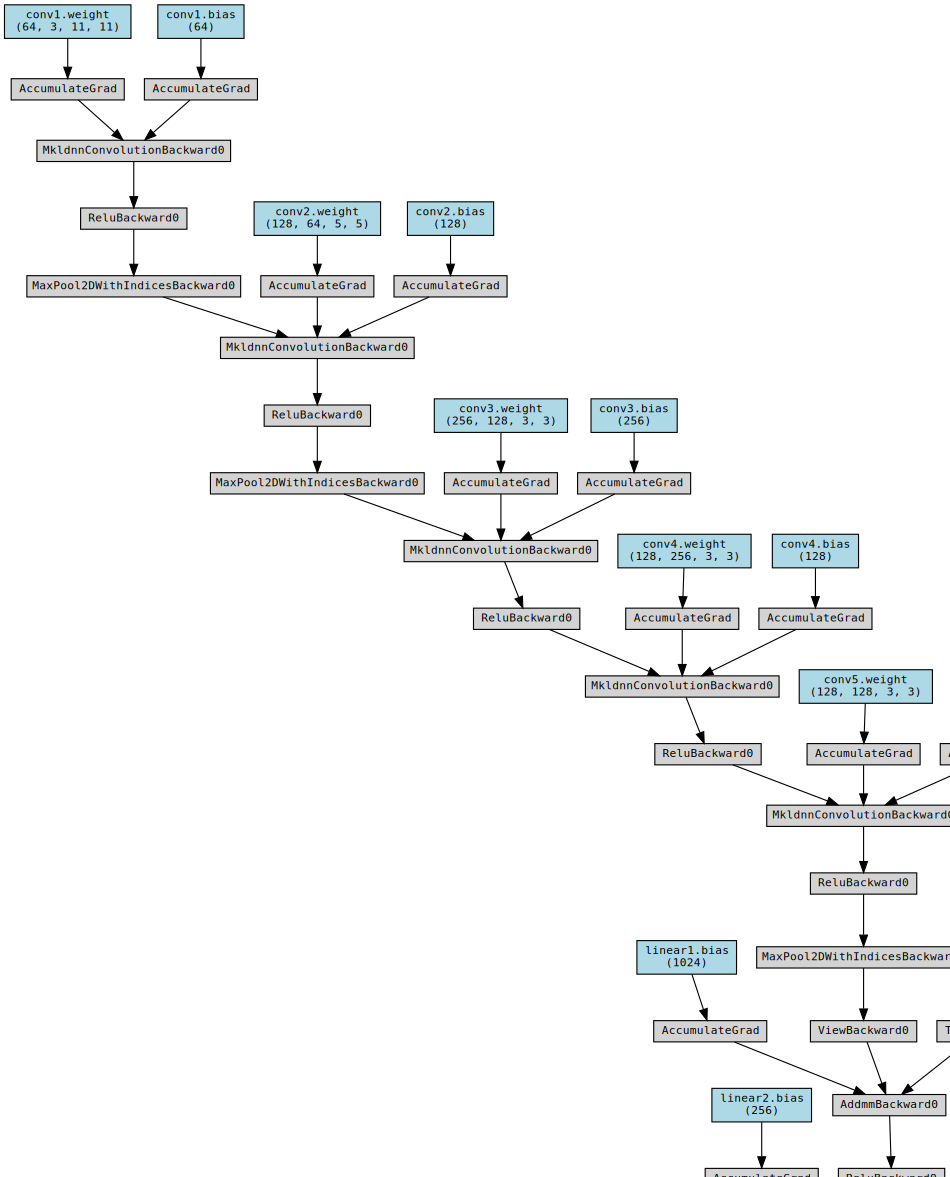

In [105]:
class TestModel(nn.Module):
    def __init__(self):
        super(TestModel, self).__init__() # this line must be done first
        ###############################################################################
        # TODO : Define the model described above by specifying the required layers   #
        # Hints:                                                                      #
        # self.conv1 = ?                                                              #
        # self.relu = ?                                                               #
        # self.maxpool1 = ?                                                           #
        # self.conv2 = ?                                                              #
        # ...                                                                         #
        ###############################################################################
        
        # 1
        self.conv1 = nn.Conv2d(3, 64, 11, stride = 4, padding = 2)
        self.relu = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size = 3, stride=2)
        # 2
        self.conv2 = nn.Conv2d(64, 128, 5, padding = 2)
        self.maxpool2 = nn.MaxPool2d(kernel_size = 3, stride=2)
        # 3
        self.conv3 = nn.Conv2d(128, 256, 3, padding = 1)
        # 4
        self.conv4 = nn.Conv2d(256, 128, 3, padding = 1)
        # 5
        self.conv5 = nn.Conv2d(128, 128, 3, padding = 1)
        self.maxpool5 = nn.MaxPool2d(kernel_size = 3, stride=2)
        # linear
        self.linear1 = nn.Linear(4608, 1024)
        self.linear2 = nn.Linear(1024,  256)
        self.linear3 = nn.Linear( 256,   20)
        
        
        
        
        ###############################################################################
        #                            END TO DO                                         #
        ###############################################################################
        
    
    def forward(self, x):
        ###############################################################################
        # TODO : Implement the forward function, you should use the layers            #
        #        defined in __init__ function and connect them                        #
        # Hints:                                                                      #
        # x = self.?(?)                                                               #
        # x = self.?(?)                                                               #
        # ...                                                                         #
        ###############################################################################
        x = self.conv1(x)
        x = self.relu(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.maxpool2(x)
        x = self.conv3(x)
        x = self.relu(x)
        x = self.conv4(x)
        x = self.relu(x)
        x = self.conv5(x)
        x = self.relu(x)
        x = self.maxpool5(x)
        x = flatten(x)
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        x = self.relu(x)
        x = self.linear3(x)
        ###############################################################################
        #                            END TODO                                         #
        ###############################################################################
        
        return x

x = torch.randn(4, 3, 224, 224)
model = TestModel()
make_dot(model(x), params=dict(model.named_parameters()))
# 可以將畫出來的圖與助教提供的圖對比看看是否一樣或十分相似

### 2.3 使用 nn.Sequential 建立模型
```nn.Sequential``` 的不同之處在於可以直接從一系列的 layer 建立模型，不需定義 ```__init__``` 也不用定義 ```forward``` ，會自動依序用每一層進行 forward ，相對地，其成員皆需有 ```forward``` 可以呼叫。

請完成以下被註解框起來的區域。

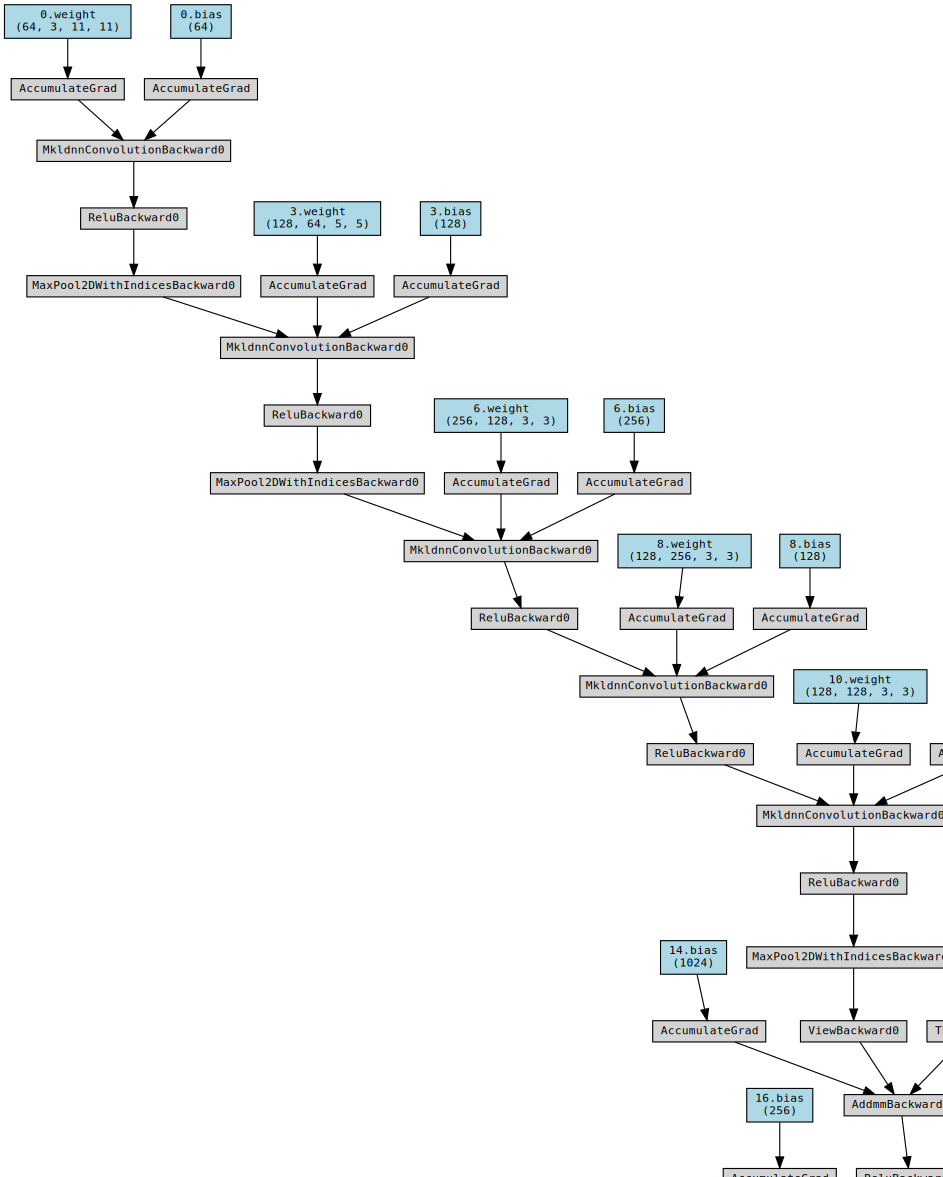

In [106]:
# wrap the flatten function
class Flatten(nn.Module):
    def forward(self, x):
        return flatten(x)

model = None
###############################################################################
# TODO : Define the model described above using nn.Sequential                 #
# Hints:                                                                      #
# model = nn.Sequential(...)                                                  #
###############################################################################
model = nn.Sequential(
    # 1
    nn.Conv2d(3, 64, 11, stride = 4, padding = 2),    
    nn.ReLU(),
    nn.MaxPool2d(kernel_size = 3, stride=2),          
    # 2
    nn.Conv2d(64, 128, 5, padding = 2),               
    nn.ReLU(),
    nn.MaxPool2d(kernel_size = 3, stride = 2),          
    # 3
    nn.Conv2d(128, 256, 3, padding = 1),              
    nn.ReLU(),
    # 4
    nn.Conv2d(256, 128, 3, padding = 1),              
    nn.ReLU(),
    # 5
    nn.Conv2d(128, 128, 3, padding = 1),                
    nn.ReLU(),
    nn.MaxPool2d(kernel_size = 3, stride=2),          
    
    Flatten(),
    # linear
    nn.Linear(4608, 1024),
    nn.ReLU(),
    nn.Linear(1024,  256),
    nn.ReLU(),
    nn.Linear( 256,   20)
)            
###############################################################################
#                            END TODO                                         #
###############################################################################

x = torch.randn(4, 3, 224, 224)
make_dot(model(x), params=dict(model.named_parameters()))
# 可以將畫出來的圖與助教提供的圖對比看看是否一樣或十分相似

### 2.4 自行設計模型
請使用上述任一種方式設計自己的模型(實體化後的模型名稱為 ```mymodel```)，並解釋自己的設計。最後的分類為 20 個類別。

## **不可以直接呼叫```torchvision.models```中已經寫好的模型，但可以照著論文中的模型架構手刻出來**

## **不可以使用預訓練過的模型權重作為初始狀態，也就是不能用預訓練的模型再 fine-tune**

請完成以下被註解框起來的區域。

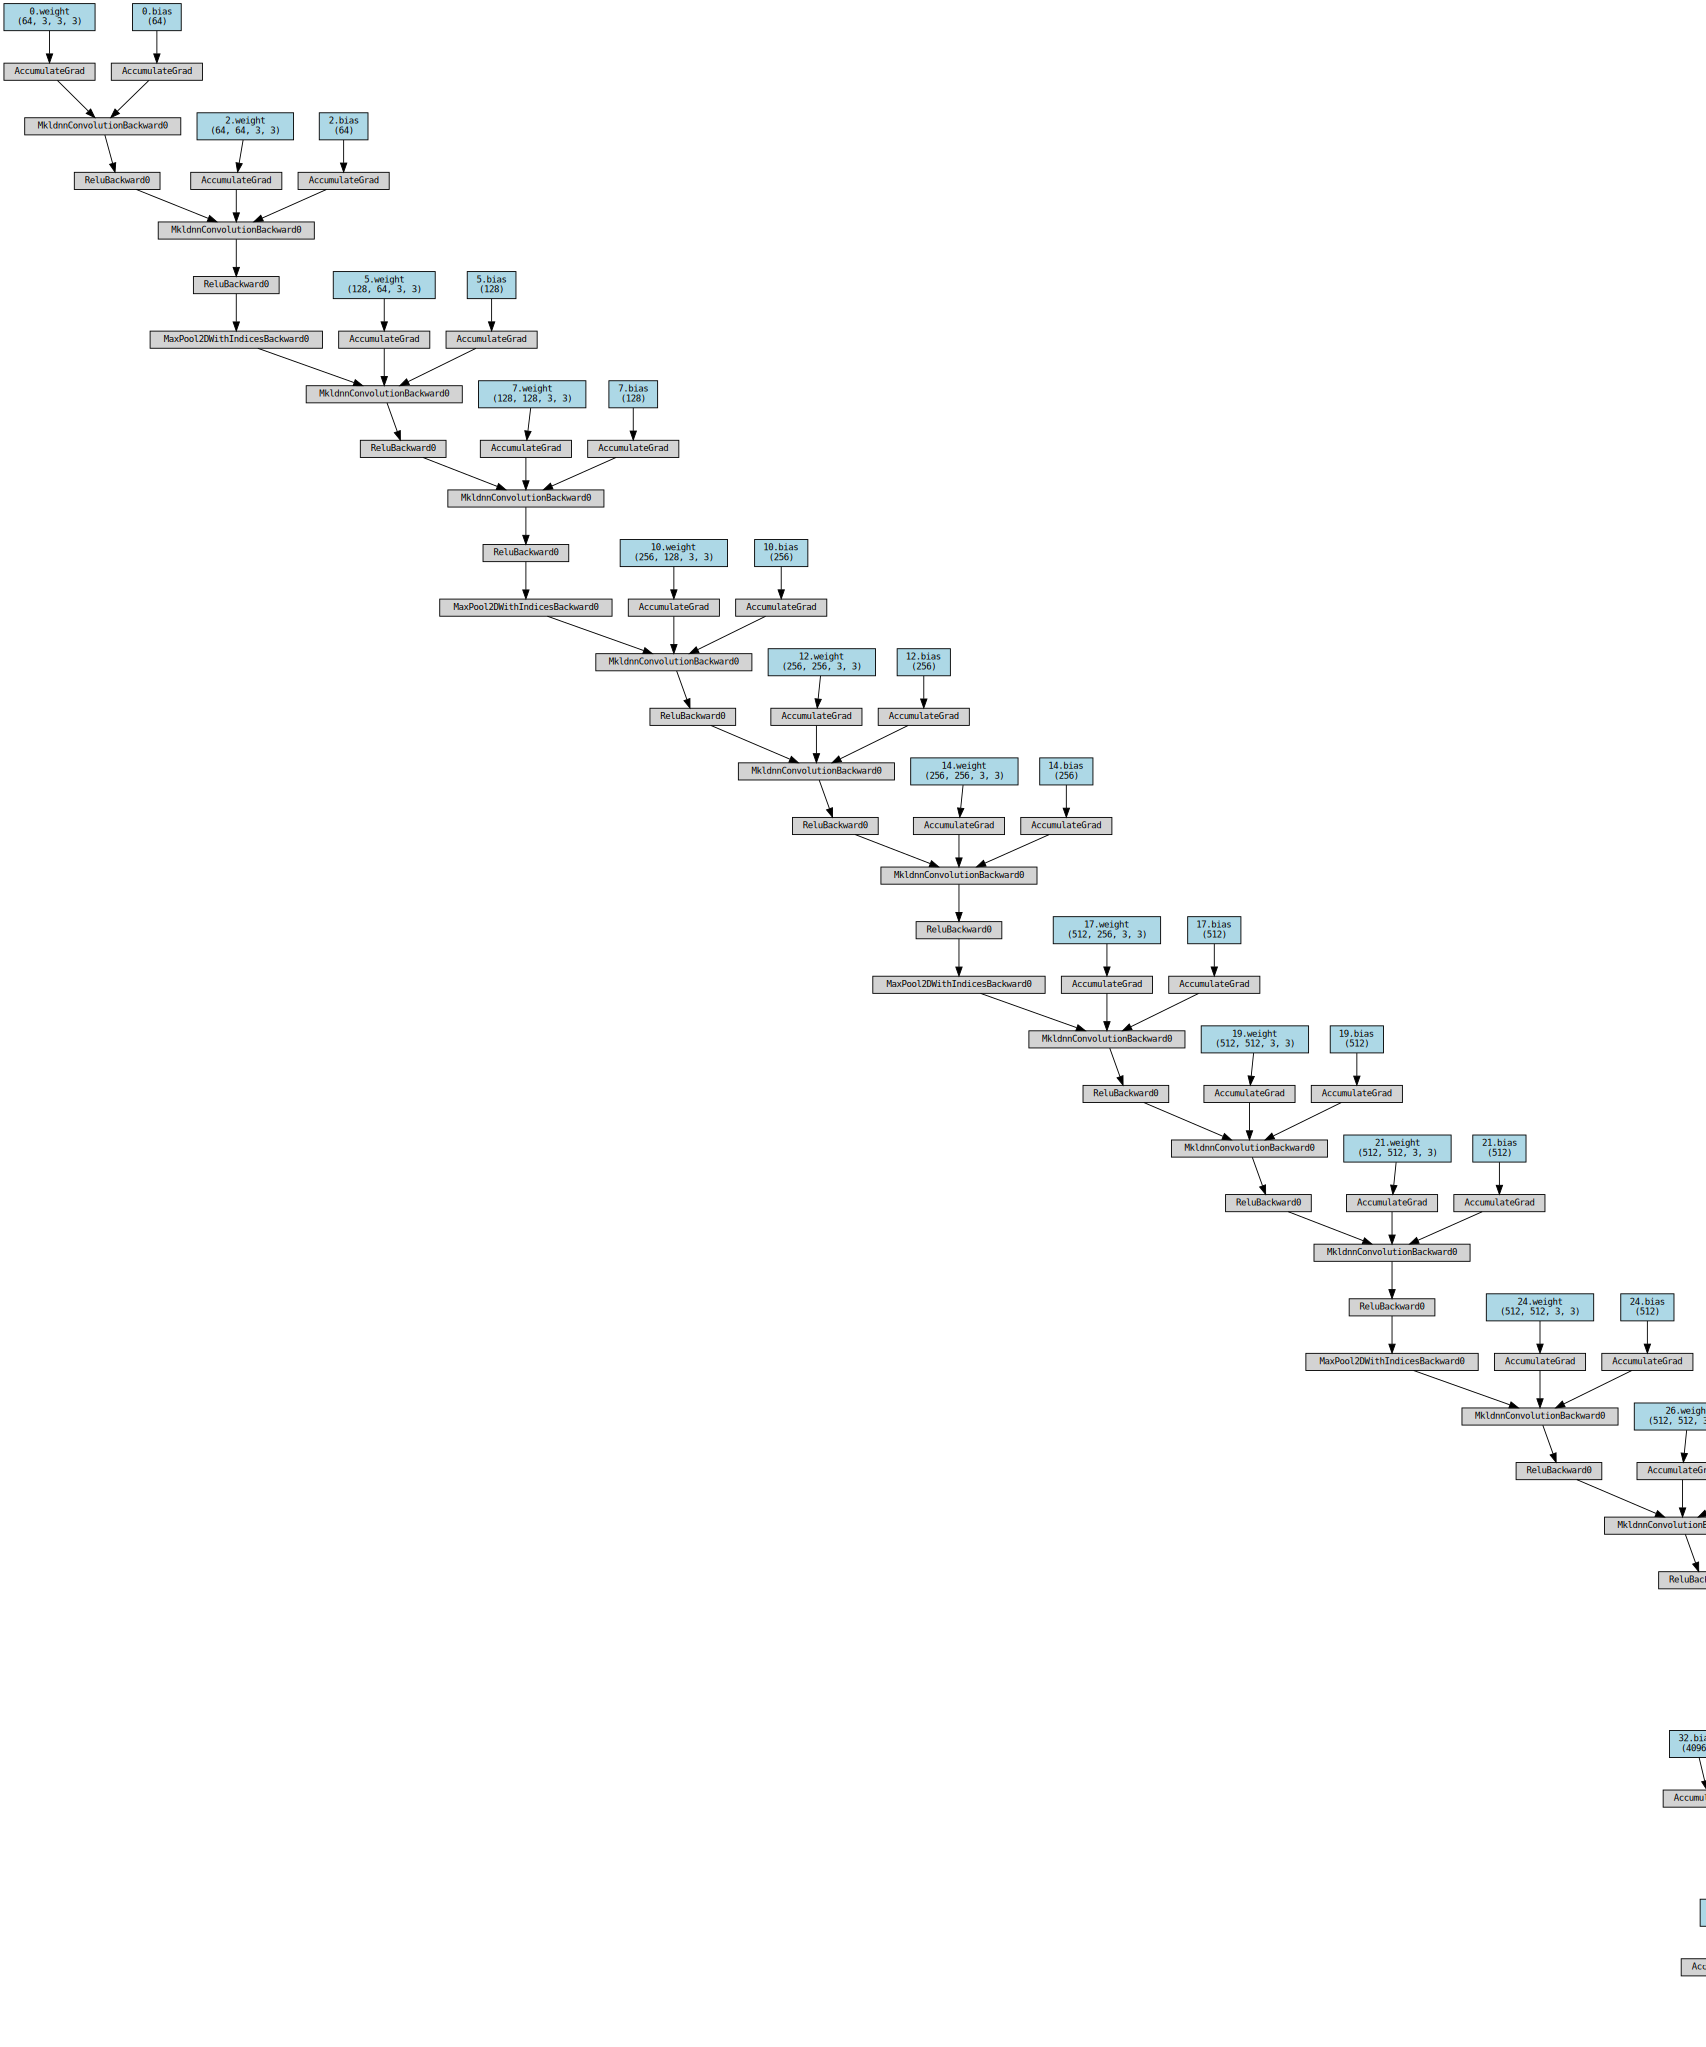

In [107]:
# mymodel = None
# ###############################################################################
# # TODO : Design your own model and instantiate as mymodel.                    #
# # Hint:                                                                       #
# # You can start from modifying the model above.                               #
# ###############################################################################
mymodel = nn.Sequential(
                nn.Conv2d(3, 64, 3, stride = 1, padding = 1),
                nn.ReLU(),
                nn.Conv2d(64, 64, 3, stride = 1, padding = 1),
                nn.ReLU(),
                nn.MaxPool2d(kernel_size = 2, stride = 2),
    
                nn.Conv2d(64, 128, 3, stride = 1, padding = 1),
                nn.ReLU(),
                nn.Conv2d(128, 128, 3, stride = 1, padding = 1), 
                nn.ReLU(),
                nn.MaxPool2d(kernel_size = 2, stride = 2),
    
                nn.Conv2d(128, 256, 3, stride = 1, padding = 1),
                nn.ReLU(),
                nn.Conv2d(256, 256, 3, stride = 1, padding = 1),
                nn.ReLU(),
                nn.Conv2d(256, 256, 3, stride = 1, padding = 1),
                nn.ReLU(),
                nn.MaxPool2d(kernel_size = 2, stride = 2),      # 16
    
                nn.Conv2d(256, 512, 3, stride = 1, padding = 1),
                nn.ReLU(),
                nn.Conv2d(512, 512, 3, stride = 1, padding = 1),
                nn.ReLU(),
                nn.Conv2d(512, 512, 3, stride = 1, padding = 1),
                nn.ReLU(),
                nn.MaxPool2d(kernel_size = 2, stride = 2),
                
                nn.Conv2d(512, 512, 3, stride = 1, padding = 1),
                nn.ReLU(),
                nn.Conv2d(512, 512, 3, stride = 1, padding = 1),
                nn.ReLU(),
                nn.Conv2d(512, 512, 3, stride = 1, padding = 1),
                nn.ReLU(),
                nn.MaxPool2d(kernel_size = 2, stride = 2),
                
                Flatten(),
    
                nn.Linear(7*7*512, 4096),
                nn.ReLU(),
                nn.Dropout(p = 0.5),
                nn.Linear(4096, 4096),
                nn.ReLU(),
                nn.Dropout(p = 0.5),
                nn.Linear(4096, 1024),
                nn.ReLU(),
                nn.Dropout(p = 0.5),
                nn.Linear(1024, 20)
            )   
# ###############################################################################
# #                            END TODO                                         #
# ###############################################################################
x = torch.randn(4, 3, 224, 224)
make_dot(mymodel(x), params=dict(mymodel.named_parameters()))

#### 解釋寫在這裡
由於VGG架構於各種圖像辨識任務的表現都還不錯，因此決定架設常見的VGG16來進行本次任務。
由於model層數不淺，加上資料集以深度學習的角度來看算是非常少，所以決定調整EPOCHS及LR來提昇accuracy。

## 3 訓練模型

### 3.1 設定 loss function 以及 optimizer
+ 對於分類問題，通常使用 cross entropy 就足夠
+ Optimizer 常用的有 SGD, Adam 等等

請完成以下 ? 處以及被註解框起來的區域。

In [108]:
# 使用哪種 model
model = mymodel
print(model)

criterion = None
optimizer = None
###############################################################################
# TODO : Setting up loss function (criterion) and optimizer                   #
###############################################################################
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = LR)
###############################################################################
#                            END TODO                                         #
###############################################################################

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU()
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU()
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU()
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU()
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU()
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU()
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (18): ReLU()
  (19): Conv2d(512, 512, ke

In [109]:
# 這個 cell 不用填

# helper functions
def accuracy(outputs, targets):
    """Compute accuracy"""
    batch_size = targets.size(0)

    pred = outputs.argmax(1)
    correct = pred.eq(targets)
    acc = correct.float().sum(0) / batch_size

    return acc

class AverageMeter(object):
    """A Meter that records numbers and compute the average."""
    def __init__(self):
        self.reset()
    
    def reset(self):
        self.val = 0.0
        self.avg = 0.0
        self.sum = 0.0
        self.count = 0.0
    
    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

### 3.2 開始訓練
流程：

訓練階段，在一個 iteration 中，
1. 取出 batch 中的資料
2. 由模型預測分類結果 (forward)
3. 計算 loss 
4. 清空梯度
5. backward 計算梯度
6. 更新模型參數

重複以上動作直到所有 batch 迭代完成後，進入測試階段，使用測試集測試模型表現，計算準確度。

到這裡是一個 epoch 的動作，重複直到設定的 epoch 數量後結束。

以下會把每一個 epoch 的訓練和測試部份寫成兩個 function，請完成 ? 的部分。

In [110]:
def train(epoch, model, loader, criterion, optimizer):
    """This function trains for 1 epoch and returns the epoch loss and accuracy."""
    # recorders
    loss_m = AverageMeter()
    acc_m = AverageMeter()
    
    model.train() # 1. Set model to training mode
    
    for idx, (imgs, labels) in enumerate(loader): # load data
        # put the data to correct device
        imgs, labels = imgs.to(device), labels.to(device)

        # 2. model forward
        outputs = model(imgs)

        # 3. calculate loss
        loss = criterion(outputs, labels)

        # 4. clear optimizer gradients
        optimizer.zero_grad()

        # 5. backward to calculate gradients
        loss.backward()

        # 6. update model parameters
        optimizer.step()
        
        # 7. accuracy
        acc = accuracy(outputs, labels)
        
        # record loss and acc
        loss_m.update(loss.item(), imgs.size(0))
        acc_m.update(acc.item(), imgs.size(0))
        
        # logging
        if (idx >= 0) and (idx % PRINT_FREQ == 0):
            print("[{:3d}/{}] Train Loss {:.3f} Acc {:.3f}".format(
                idx, len(loader), loss_m.val, acc_m.val
            ))
        
    return loss_m.avg, acc_m.avg
    

In [111]:
def test(model, loader, criterion):
    """This function tests the model on the test set."""
    # recorders
    loss_m = AverageMeter()
    out_list, y_list = [], []
    
    model.eval() # 1. set model to eval mode
    
    with torch.no_grad(): # no need to compute gradient when testing
        for imgs, labels in loader:
            imgs, labels = imgs.to(device), labels.to(device)
            
            # 2. model forward
            outputs = model(imgs)
            
            # 3. compute loss
            loss = criterion(outputs, labels)
            
            y_list.append(labels)
            out_list.append(outputs)
            loss_m.update(loss.item())
        
        # concat all predictions and answers to compute accuracy
        pred = torch.cat(out_list)
        y = torch.cat(y_list)
        # 4. accuracy
        acc = accuracy(outputs, labels)
    
    return loss_m.avg, acc.item()

#### Let's GOOOOOO

請完成以下 ? 處，並執行這個 cell 以開始訓練。

In [112]:
# move model to GPU if available
if device == 'cuda':
    model.cuda()
  
# for recording
train_loss, test_loss = [], []
train_acc, test_acc = [], []
best_acc = (0, 0.0) # (epoch, acc)
for epoch in range(EPOCHS):
    print("---------------- Epoch {} ----------------".format(epoch+1))
    
    # 1. training
    loss, acc = train(epoch, model, train_loader, criterion, optimizer)
    # saving epoch loss and acc for plotting
    train_loss.append(loss)
    train_acc.append(acc)
    # logging
    print('Epoch {:3d}/{} Train Loss {:.3f} Acc {:.3f}'.format(epoch+1, EPOCHS, loss, acc))
    
    # 2. testing
    print("---------------- Testing ----------------")
    loss, acc = test(model, test_loader, criterion)
    test_loss.append(loss)
    test_acc.append(acc)        
    # logging
    print('Epoch {:3d}/{} Test Loss {:.3f} Acc {:.3f}'.format(epoch+1, EPOCHS, loss, acc))
    
    if acc > best_acc[1]:
        best_acc = (epoch+1, acc)

print('--' * 10)
print('The Best accuracy is {:.3f} at epoch {}'.format(best_acc[1], best_acc[0]))

---------------- Epoch 1 ----------------
[  0/91] Train Loss 2.993 Acc 0.125
[ 10/91] Train Loss 2.994 Acc 0.062
[ 20/91] Train Loss 2.981 Acc 0.031
[ 30/91] Train Loss 2.981 Acc 0.125
[ 40/91] Train Loss 3.050 Acc 0.031
[ 50/91] Train Loss 2.948 Acc 0.094
[ 60/91] Train Loss 3.026 Acc 0.000
[ 70/91] Train Loss 2.995 Acc 0.031
[ 80/91] Train Loss 2.999 Acc 0.062
[ 90/91] Train Loss 2.999 Acc 0.000
Epoch   1/100 Train Loss 2.993 Acc 0.069
---------------- Testing ----------------
Epoch   1/100 Test Loss 2.990 Acc 0.065
---------------- Epoch 2 ----------------
[  0/91] Train Loss 2.990 Acc 0.062
[ 10/91] Train Loss 2.962 Acc 0.125
[ 20/91] Train Loss 2.988 Acc 0.156
[ 30/91] Train Loss 2.999 Acc 0.062
[ 40/91] Train Loss 2.978 Acc 0.125
[ 50/91] Train Loss 2.941 Acc 0.125
[ 60/91] Train Loss 2.951 Acc 0.062
[ 70/91] Train Loss 2.927 Acc 0.062
[ 80/91] Train Loss 3.016 Acc 0.031
[ 90/91] Train Loss 2.892 Acc 0.000
Epoch   2/100 Train Loss 2.972 Acc 0.069
---------------- Testing -------

[ 80/91] Train Loss 2.409 Acc 0.281
[ 90/91] Train Loss 2.561 Acc 0.222
Epoch  16/100 Train Loss 2.483 Acc 0.217
---------------- Testing ----------------
Epoch  16/100 Test Loss 2.406 Acc 0.290
---------------- Epoch 17 ----------------
[  0/91] Train Loss 2.503 Acc 0.219
[ 10/91] Train Loss 2.367 Acc 0.250
[ 20/91] Train Loss 2.666 Acc 0.094
[ 30/91] Train Loss 2.477 Acc 0.250
[ 40/91] Train Loss 2.257 Acc 0.250
[ 50/91] Train Loss 2.308 Acc 0.281
[ 60/91] Train Loss 2.493 Acc 0.188
[ 70/91] Train Loss 2.633 Acc 0.250
[ 80/91] Train Loss 2.547 Acc 0.219
[ 90/91] Train Loss 2.391 Acc 0.111
Epoch  17/100 Train Loss 2.485 Acc 0.209
---------------- Testing ----------------
Epoch  17/100 Test Loss 2.396 Acc 0.194
---------------- Epoch 18 ----------------
[  0/91] Train Loss 2.188 Acc 0.312
[ 10/91] Train Loss 2.412 Acc 0.188
[ 20/91] Train Loss 2.371 Acc 0.188
[ 30/91] Train Loss 2.245 Acc 0.312
[ 40/91] Train Loss 2.373 Acc 0.156
[ 50/91] Train Loss 2.271 Acc 0.312
[ 60/91] Train Loss 

[ 20/91] Train Loss 2.250 Acc 0.094
[ 30/91] Train Loss 2.360 Acc 0.344
[ 40/91] Train Loss 2.282 Acc 0.188
[ 50/91] Train Loss 2.243 Acc 0.250
[ 60/91] Train Loss 2.205 Acc 0.375
[ 70/91] Train Loss 2.306 Acc 0.219
[ 80/91] Train Loss 2.378 Acc 0.125
[ 90/91] Train Loss 1.907 Acc 0.444
Epoch  32/100 Train Loss 2.245 Acc 0.277
---------------- Testing ----------------
Epoch  32/100 Test Loss 2.157 Acc 0.323
---------------- Epoch 33 ----------------
[  0/91] Train Loss 2.221 Acc 0.406
[ 10/91] Train Loss 1.811 Acc 0.438
[ 20/91] Train Loss 1.892 Acc 0.375
[ 30/91] Train Loss 2.083 Acc 0.219
[ 40/91] Train Loss 2.232 Acc 0.250
[ 50/91] Train Loss 2.072 Acc 0.281
[ 60/91] Train Loss 2.027 Acc 0.344
[ 70/91] Train Loss 1.961 Acc 0.406
[ 80/91] Train Loss 1.997 Acc 0.375
[ 90/91] Train Loss 1.832 Acc 0.333
Epoch  33/100 Train Loss 2.216 Acc 0.291
---------------- Testing ----------------
Epoch  33/100 Test Loss 2.208 Acc 0.323
---------------- Epoch 34 ----------------
[  0/91] Train Loss 

Epoch  47/100 Test Loss 1.948 Acc 0.452
---------------- Epoch 48 ----------------
[  0/91] Train Loss 2.236 Acc 0.312
[ 10/91] Train Loss 2.257 Acc 0.219
[ 20/91] Train Loss 1.875 Acc 0.344
[ 30/91] Train Loss 2.158 Acc 0.344
[ 40/91] Train Loss 2.196 Acc 0.219
[ 50/91] Train Loss 1.793 Acc 0.375
[ 60/91] Train Loss 1.617 Acc 0.500
[ 70/91] Train Loss 2.069 Acc 0.312
[ 80/91] Train Loss 2.135 Acc 0.281
[ 90/91] Train Loss 1.883 Acc 0.444
Epoch  48/100 Train Loss 2.075 Acc 0.342
---------------- Testing ----------------
Epoch  48/100 Test Loss 1.938 Acc 0.355
---------------- Epoch 49 ----------------
[  0/91] Train Loss 1.891 Acc 0.469
[ 10/91] Train Loss 1.828 Acc 0.375
[ 20/91] Train Loss 1.701 Acc 0.438
[ 30/91] Train Loss 1.877 Acc 0.469
[ 40/91] Train Loss 1.986 Acc 0.312
[ 50/91] Train Loss 1.920 Acc 0.438
[ 60/91] Train Loss 1.818 Acc 0.406
[ 70/91] Train Loss 2.120 Acc 0.344
[ 80/91] Train Loss 1.892 Acc 0.438
[ 90/91] Train Loss 1.975 Acc 0.444
Epoch  49/100 Train Loss 2.015 

[ 70/91] Train Loss 1.969 Acc 0.438
[ 80/91] Train Loss 1.666 Acc 0.531
[ 90/91] Train Loss 1.305 Acc 0.611
Epoch  63/100 Train Loss 1.814 Acc 0.416
---------------- Testing ----------------
Epoch  63/100 Test Loss 1.789 Acc 0.387
---------------- Epoch 64 ----------------
[  0/91] Train Loss 1.924 Acc 0.375
[ 10/91] Train Loss 2.151 Acc 0.312
[ 20/91] Train Loss 1.674 Acc 0.531
[ 30/91] Train Loss 1.923 Acc 0.438
[ 40/91] Train Loss 1.800 Acc 0.375
[ 50/91] Train Loss 1.540 Acc 0.406
[ 60/91] Train Loss 1.964 Acc 0.312
[ 70/91] Train Loss 1.681 Acc 0.500
[ 80/91] Train Loss 1.804 Acc 0.375
[ 90/91] Train Loss 1.765 Acc 0.389
Epoch  64/100 Train Loss 1.774 Acc 0.429
---------------- Testing ----------------
Epoch  64/100 Test Loss 1.769 Acc 0.516
---------------- Epoch 65 ----------------
[  0/91] Train Loss 1.804 Acc 0.406
[ 10/91] Train Loss 1.832 Acc 0.562
[ 20/91] Train Loss 1.543 Acc 0.469
[ 30/91] Train Loss 1.774 Acc 0.469
[ 40/91] Train Loss 1.878 Acc 0.344
[ 50/91] Train Loss 

[ 10/91] Train Loss 1.837 Acc 0.406
[ 20/91] Train Loss 1.515 Acc 0.531
[ 30/91] Train Loss 1.243 Acc 0.531
[ 40/91] Train Loss 1.719 Acc 0.469
[ 50/91] Train Loss 1.529 Acc 0.438
[ 60/91] Train Loss 1.536 Acc 0.469
[ 70/91] Train Loss 2.151 Acc 0.312
[ 80/91] Train Loss 1.278 Acc 0.625
[ 90/91] Train Loss 1.304 Acc 0.667
Epoch  79/100 Train Loss 1.615 Acc 0.496
---------------- Testing ----------------
Epoch  79/100 Test Loss 1.715 Acc 0.323
---------------- Epoch 80 ----------------
[  0/91] Train Loss 1.619 Acc 0.500
[ 10/91] Train Loss 1.531 Acc 0.469
[ 20/91] Train Loss 1.668 Acc 0.281
[ 30/91] Train Loss 1.373 Acc 0.531
[ 40/91] Train Loss 1.644 Acc 0.531
[ 50/91] Train Loss 1.477 Acc 0.531
[ 60/91] Train Loss 1.933 Acc 0.406
[ 70/91] Train Loss 2.138 Acc 0.250
[ 80/91] Train Loss 1.523 Acc 0.531
[ 90/91] Train Loss 1.665 Acc 0.389
Epoch  80/100 Train Loss 1.613 Acc 0.478
---------------- Testing ----------------
Epoch  80/100 Test Loss 1.752 Acc 0.419
---------------- Epoch 81 -

Epoch  94/100 Test Loss 1.671 Acc 0.452
---------------- Epoch 95 ----------------
[  0/91] Train Loss 1.805 Acc 0.438
[ 10/91] Train Loss 1.525 Acc 0.562
[ 20/91] Train Loss 1.495 Acc 0.500
[ 30/91] Train Loss 1.371 Acc 0.500
[ 40/91] Train Loss 1.311 Acc 0.594
[ 50/91] Train Loss 1.244 Acc 0.656
[ 60/91] Train Loss 1.419 Acc 0.531
[ 70/91] Train Loss 1.196 Acc 0.594
[ 80/91] Train Loss 1.712 Acc 0.469
[ 90/91] Train Loss 1.736 Acc 0.389
Epoch  95/100 Train Loss 1.473 Acc 0.531
---------------- Testing ----------------
Epoch  95/100 Test Loss 1.711 Acc 0.323
---------------- Epoch 96 ----------------
[  0/91] Train Loss 1.220 Acc 0.625
[ 10/91] Train Loss 1.493 Acc 0.406
[ 20/91] Train Loss 1.422 Acc 0.531
[ 30/91] Train Loss 1.359 Acc 0.531
[ 40/91] Train Loss 1.528 Acc 0.375
[ 50/91] Train Loss 1.213 Acc 0.562
[ 60/91] Train Loss 1.218 Acc 0.594
[ 70/91] Train Loss 1.210 Acc 0.656
[ 80/91] Train Loss 1.307 Acc 0.594
[ 90/91] Train Loss 1.524 Acc 0.556
Epoch  96/100 Train Loss 1.423 

### 3.3 儲存模型
PyTorch 提供 ```torch.save()``` API 可以儲存模型。

PyTorch 建議使用 ```state_dict``` 來儲存模型(要存整個模型也可以)，```state_dict``` 包含模型的可學習參數(如 conv layers 的 weight 和 bias) 以及 registered buffer (如 batchnorm running mean) 。 由於 ```state_dict``` 屬於 python dictionaries ，所以有很大的使用彈性。

這裡我們只儲存最後的模型狀態，你也可以在每一個 epoch 後儲存一個節點或儲存擁有最佳表現的模型。常用的附檔名為 ```.pt``` 或 ```.pth```。

請完成以下 ? 處。

In [ ]:
save_path = 'mymodel.pth'
torch.save(model.state_dict(), save_path)

### 3.4 繪製訓練過程的 loss 與 accuracy 變化
在訓練過程中，我們透過 ```list``` 儲存每個 epoch 的 loss 和 accuracy，現在透過 ```matplotlib.pyplot``` 將這些數值畫成圖表，可以幫助我們分析訓練過程的變化。

請完成以下 ? 處

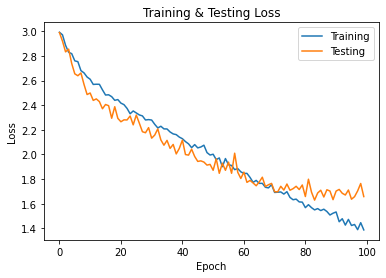

In [113]:
# plotting loss curves
x = list(range(EPOCHS))
plt.plot(x, train_loss, x, test_loss)
plt.title('Training & Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Testing'])
plt.show()

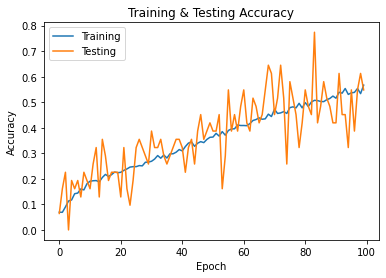

In [114]:
# plotting acc curves
x = list(range(EPOCHS))
plt.plot(x, train_acc, x, test_acc)
plt.title('Training & Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Testing'])
plt.show()

## 參考資料 & 教學

### Transformations
+ https://pytorch.org/tutorials/beginner/basics/transforms_tutorial.html
+ https://pytorch.org/vision/stable/transforms.html 可以知道每種方法產生的效果
+ https://chih-sheng-huang821.medium.com/03-pytorch-dataaug-a712a7a7f55e

### Dataset
+ https://pytorch.org/tutorials/beginner/data_loading_tutorial.html#dataset-class
+ https://pytorch.org/tutorials/beginner/basics/data_tutorial.html#creating-a-custom-dataset-for-your-files

### Dataloader
+ https://pytorch.org/tutorials/beginner/basics/data_tutorial.html#preparing-your-data-for-training-with-dataloaders

### Model
#### Module
+ https://pytorch.org/docs/stable/generated/torch.nn.Module.html
+ https://pytorch.org/docs/stable/nn.html (conv, batchnorm, pooling layer 的詳細用法可以在這裡找到)

#### Custom Model
+ https://pytorch.org/tutorials/beginner/examples_nn/two_layer_net_module.html

#### nn.Sequential
+ https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html

### Training
#### Optimizer
+ https://pytorch.org/docs/stable/optim.html

#### Loss function
+ https://pytorch.org/docs/stable/nn.html#loss-functions


#### Saving model
+ https://pytorch.org/tutorials/beginner/saving_loading_models.html